# Decision Trees for Regressio Task

In this project we will work on regression problem (dataset California Housing Prices) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

Loading data:  
we will use only the following columns:
- 'latitude',

- 'longitude',

- 'housing_median_age',

- 'total_rooms',

- 'total_bedrooms',

- 'population',

- 'households',

- 'median_income',

- 'median_house_value',

- 'ocean_proximity'

In [127]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn.metrics import mean_squared_error

#models:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [105]:
df = pd.read_csv('./data/housing.csv')
df = df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity'
]]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [106]:
# how many empty values are present:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [107]:
# fill empty cells with 0:
df = df.fillna(0)

In [108]:
# for distribution closer to normal we will use Log transformation:
df['median_house_value'] = np.log1p(df['median_house_value'])

In [109]:
# data splitting:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

n = len(df)
n_full_train = len(df_full_train)
n_train = len(df_train)
n_val = len(df_val)
n_test = len(df_test)

share_full_train = n_full_train / n * 100
share_train = n_train / n * 100
share_val = n_val / n * 100
share_test = n_test / n * 100

print(f'n total = {n}')
print(f'n_full_train = {n_full_train}, which is {share_full_train} %')
print(f'n_train = {n_train}, which is {share_train} %')
print(f'n_val = {n_val}, which is {share_val} %')
print(f'n_test = {n_test}, which is {share_val} %')
print(f'test_sum = {n_train + n_val + n_test}')

n total = 20640
n_full_train = 16512, which is 80.0 %
n_train = 12384, which is 60.0 %
n_val = 4128, which is 20.0 %
n_test = 4128, which is 20.0 %
test_sum = 20640


In [110]:
# separate target variables:
y_full_train = df_full_train['median_house_value'].values
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

# drop target variable from feature matrix:
df_full_train = df_full_train.drop(columns=['median_house_value'])
df_train = df_train.drop(columns=['median_house_value'])
df_val = df_val.drop(columns=['median_house_value'])
df_test = df_test.drop(columns=['median_house_value'])

In [111]:
# one-hot encoding:

# dictionaries of feature matrices:
dicts_full_train = df_full_train.to_dict(orient='records')
dicts_train = df_train.to_dict(orient='records')
dicts_val = df_val.to_dict(orient='records')
dicts_test = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(dicts_full_train)

X_full_train = dv.transform(dicts_full_train)
X_train = dv.transform(dicts_train)
X_val = dv.transform(dicts_val)
X_test = dv.transform(dicts_test)

Now let's train Decision Stamp (Decision Tree Regressor with depth=1) and see what feature gave the best splitting result:

In [112]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'ocean_proximity=INLAND <= 0.5\nsquared_error = 0.322\nsamples = 12384\nvalue = 12.088'),
 Text(0.25, 0.25, 'squared_error = 0.214\nsamples = 8483\nvalue = 12.307'),
 Text(0.75, 0.25, 'squared_error = 0.227\nsamples = 3901\nvalue = 11.613')]

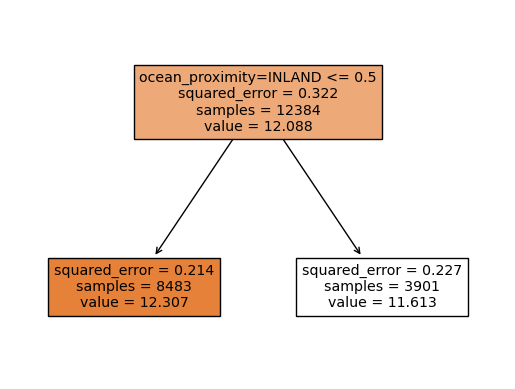

In [113]:
# visualize decision stamp:
tree.plot_tree(dtr,
               feature_names=dv.get_feature_names_out(),
               filled=True)

we can see that Decision Tree Regression found ocen proximnity being the most valuable feature, specifically whether property located In land or not

Random Forest model generally shows better performance than stand alone Decision Tree model, since it combines different Decision Trees together, so let's train Random Forest Regressor

In [114]:
rfr = RandomForestRegressor(n_estimators=10,
                            random_state=1,
                            n_jobs=-1)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f'mean_squared_error on validation data = {round(rmse, 2)}')

mean_squared_error on validation data = 0.25


Now let's experiment with parameter: n_estimators
- we will try values starting from 10 to 200 with step=10
- with random state fixed = 1 for reproducibility
- we will evaluate model on validation dataset

In [115]:
scores = []
for n in range(10, 201, 10):
    rfr = RandomForestRegressor(n_estimators = n,
                                random_state = 1,
                                n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    scores.append((n, rmse))
    print(f'n = {n}, rmse = {rmse}')
                        

n = 10, rmse = 0.2457383433183843
n = 20, rmse = 0.2392615914316236
n = 30, rmse = 0.23571658024242997
n = 40, rmse = 0.23458299288526632
n = 50, rmse = 0.23310354554874652
n = 60, rmse = 0.2328429808263216
n = 70, rmse = 0.23238404627057696
n = 80, rmse = 0.2325270885881096
n = 90, rmse = 0.23221524419442438
n = 100, rmse = 0.23196833981101553
n = 110, rmse = 0.23151835138763843
n = 120, rmse = 0.23162059722289455
n = 130, rmse = 0.23170961618874023
n = 140, rmse = 0.23169246809784286
n = 150, rmse = 0.23169445775520767
n = 160, rmse = 0.23169721161526824
n = 170, rmse = 0.23162910205851622
n = 180, rmse = 0.23179023607197155
n = 190, rmse = 0.23176241418109447
n = 200, rmse = 0.23165006514034597


In [116]:
columns = ['n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores

,n_estimators,rmse
0,10,0.245738
1,20,0.239262
2,30,0.235717
3,40,0.234583
4,50,0.233104
5,60,0.232843
6,70,0.232384
7,80,0.232527
8,90,0.232215
9,100,0.231968


<AxesSubplot: xlabel='n_estimators', ylabel='rmse'>

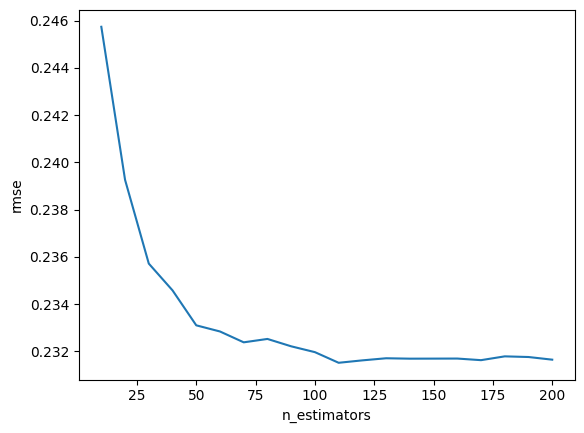

In [117]:
sns.lineplot(data=df_scores, x='n_estimators', y='rmse')

we can see that model performance is improving with increasing in number of estimators, till n_estimators = 110, where RMSE is the lowest  
after this point performance of model is stagnate and even falls a bit to the end of graph

## Tune max_depth parameter

In [119]:
# we will consider 4 different values of max_depth:

scores = []

max_depth_list = [10, 15, 20, 25]
for d in max_depth_list:
    print(f'max_depth = {d}')
    for n in range(10, 201, 10):
        rfr = RandomForestRegressor(n_estimators=n,
                                    max_depth = d,
                                    random_state=1,
                                    n_jobs=-1)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        scores.append((d, n, rmse))

max_depth = 10
max_depth = 15
max_depth = 20
max_depth = 25


In [120]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,n_estimators,rmse
0,10,10,0.255042
1,10,20,0.252784
2,10,30,0.251647
3,10,40,0.251062
4,10,50,0.250192


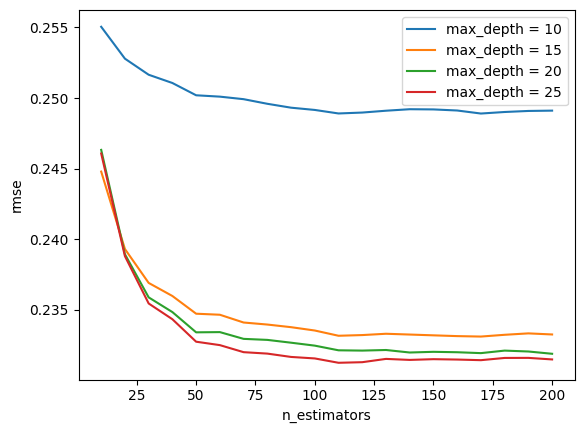

In [122]:
# visualization:
for d in max_depth_list:
    df_subset = df_scores[df_scores['max_depth'] == d]
    sns.lineplot(data=df_subset, x='n_estimators', y='rmse', label=f'max_depth = {d}')

- we can see that max_depth=10 shows the worst performance, which is far below of other models
- considering max_depth=15, 20 and 25:
    - at the beginning all these models show quite similar results, but starting from n_estimators = 25 start to diverge
    - max_depth = 15 stagnate in performance earlier and shows worse RMSE generally
    - we can see that the increase in max_depth causes increase in model performance for considered dataset

## Feature Importance from tree-based models

We can extract feature importance information from tree-based models.   
At each step Decision Tree learning algorithm finds the best split.  
When it do it, we can calculate "gain" - the reduction in impurity before and after split.  
This gain is useful in understanding what are the important features for tree-based models

In Scikit-Learn, tree-based models contain this imformation in *feature_importances_* field

now we will find the most important feature in dataset:
- Train the model with parameters:
    - n_estimators = 10
    - max_depth = 20
    - random_state = 1
    - n_jobs = -1

- get the feature importance information from this model

In [123]:
rfr = RandomForestRegressor(n_estimators=10,
                            max_depth=20,
                            random_state=1,
                            n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [126]:
df_feature_importance = pd.DataFrame({
    'feature': dv.get_feature_names_out(),
    'importance': rfr.feature_importances_
})
df_feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
4,median_income,0.362913
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101334
3,longitude,0.096265
1,housing_median_age,0.033094
10,population,0.030918
12,total_rooms,0.020536
11,total_bedrooms,0.019041
0,households,0.016957
9,ocean_proximity=NEAR OCEAN,0.004228


we can see that **median income** was the most valuable feature for algorithm during training

## XGBoost algorithm

now we will train XGBoost model and tune *eta* parameter:
- create DMatrix for datasets
- create whatchlist to monitor models performance
- train model for 100 rounds with eta=0.3
- change eta=0.1 and compare RMSE of these 2 models

In [156]:
# create DMatrix for datasets:
features = list(dv.get_feature_names_out())
# drop '<' sign:
for i in range(0, len(features)):
    features[i] = features[i].replace('<', '')
d_full_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
d_train = xgb.DMatrix(X_train, label=y_train, feature_names=features)
d_val = xgb.DMatrix(X_val, label=y_val, feature_names=features)
df_test = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [165]:
whatchlist = [(d_train, 'train'), (d_val, 'val')]

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthreads': 8,

    'seed': 1,
    'verbosity': 0,
}
xgb_model = xgb.train(xgb_params, d_train, num_boost_round=100, evals=whatchlist)
y_pred = xgb_model.predict(d_val)
rmse = mean_squared_error(y_val, y_pred)
print(f'rmse for eat=0.3 = {rmse}')

[0]	train-rmse:8.12733	val-rmse:8.13232
[1]	train-rmse:5.69586	val-rmse:5.70061
[2]	train-rmse:3.99543	val-rmse:3.99991
[3]	train-rmse:2.80713	val-rmse:2.81140
[4]	train-rmse:1.97816	val-rmse:1.98262
[5]	train-rmse:1.40154	val-rmse:1.40605
[6]	train-rmse:1.00267	val-rmse:1.00869
[7]	train-rmse:0.72632	val-rmse:0.73309
[8]	train-rmse:0.54079	val-rmse:0.55028
[9]	train-rmse:0.42004	val-rmse:0.43312
[10]	train-rmse:0.33762	val-rmse:0.35337
[11]	train-rmse:0.28878	val-rmse:0.30674
[12]	train-rmse:0.26009	val-rmse:0.28012
[13]	train-rmse:0.24213	val-rmse:0.26613
[14]	train-rmse:0.23183	val-rmse:0.25837
[15]	train-rmse:0.22493	val-rmse:0.25306
[16]	train-rmse:0.22056	val-rmse:0.24945
[17]	train-rmse:0.21489	val-rmse:0.24577
[18]	train-rmse:0.21291	val-rmse:0.24467
[19]	train-rmse:0.21002	val-rmse:0.24403
[20]	train-rmse:0.20596	val-rmse:0.24074
[21]	train-rmse:0.20332	val-rmse:0.23947
[22]	train-rmse:0.20252	val-rmse:0.23970
[23]	train-rmse:0.20104	val-rmse:0.23894
[24]	train-rmse:0.19818	va

In [168]:
whatchlist = [(d_train, 'train'), (d_val, 'val')]

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthreads': 8,

    'seed': 1,
    'verbosity': 0,
}
xgb_model = xgb.train(xgb_params, d_train, num_boost_round=100, evals=whatchlist)
y_pred = xgb_model.predict(d_val)
rmse = mean_squared_error(y_val, y_pred)
print(f'rmse for eta=0.1:  {rmse}')

[0]	train-rmse:10.44372	val-rmse:10.44933
[1]	train-rmse:9.40118	val-rmse:9.40680
[2]	train-rmse:8.46290	val-rmse:8.46827
[3]	train-rmse:7.61859	val-rmse:7.62387
[4]	train-rmse:6.85878	val-rmse:6.86363
[5]	train-rmse:6.17513	val-rmse:6.17983
[6]	train-rmse:5.55994	val-rmse:5.56433
[7]	train-rmse:5.00643	val-rmse:5.01057
[8]	train-rmse:4.50846	val-rmse:4.51254
[9]	train-rmse:4.06043	val-rmse:4.06448
[10]	train-rmse:3.65741	val-rmse:3.66123
[11]	train-rmse:3.29493	val-rmse:3.29883
[12]	train-rmse:2.96895	val-rmse:2.97269
[13]	train-rmse:2.67551	val-rmse:2.67951
[14]	train-rmse:2.41179	val-rmse:2.41589
[15]	train-rmse:2.17479	val-rmse:2.17906
[16]	train-rmse:1.96172	val-rmse:1.96607
[17]	train-rmse:1.77047	val-rmse:1.77480
[18]	train-rmse:1.59855	val-rmse:1.60301
[19]	train-rmse:1.44410	val-rmse:1.44871
[20]	train-rmse:1.30574	val-rmse:1.31081
[21]	train-rmse:1.18161	val-rmse:1.18708
[22]	train-rmse:1.06939	val-rmse:1.07513
[23]	train-rmse:0.96920	val-rmse:0.97506
[24]	train-rmse:0.87996	

We can see that the default value of eta shows better performance